In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix







In [30]:

import os
os.remove("/content/archive (1).zip")
import kagglehub


path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

print("New dataset path:", path)
!ls -lh /root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13


New dataset path: /root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13
total 2.9G
-rw-r--r-- 1 root root 2.9G Mar  8 21:54 US_Accidents_March23.csv


In [13]:
import pandas as pd

##### #Path to the CSV file
csv_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"

########## Read the first few rows only to inspect the dataset
df_sample = pd.read_csv(csv_path, nrows=5000)
print("✅ Sample Data Loaded Successfully!")
print(df_sample.info())
print(df_sample.head())


✅ Sample Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   object 
 1   Source                 5000 non-null   object 
 2   Severity               5000 non-null   int64  
 3   Start_Time             5000 non-null   object 
 4   End_Time               5000 non-null   object 
 5   Start_Lat              5000 non-null   float64
 6   Start_Lng              5000 non-null   float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           5000 non-null   float64
 10  Description            5000 non-null   object 
 11  Street                 5000 non-null   object 
 12  City                   5000 non-null   object 
 13  County                 5000 non-null   object 
 14  State                

In [4]:

import os

path_1 = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"
path_2 = "/content/Road_Traffic_Accidents.csv"

print(f"Dataset 1 exists: {os.path.exists(path_1)}")
print(f"Dataset 2 exists: {os.path.exists(path_2)}")


Dataset 1 exists: True
Dataset 2 exists: False


In [11]:
import os


!ls -lh /content/


path_2 = "/content/traffic_accidents_dict new.csv"
print(f"Dataset 2 exists: {os.path.exists(path_2)}")

dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"
dataset_2_path = "/content/traffic_accidents_dict new.csv"



total 75M
-rw-r--r-- 1 root root  75M Mar  8 22:35 'archive (1).zip'
drwx------ 6 root root 4.0K Mar  8 21:53  drive
drwxr-xr-x 1 root root 4.0K Mar  6 14:29  sample_data
-rw-r--r-- 1 root root 559K Mar  8 22:01 'traffic_accidents_dict new.csv'
Dataset 2 exists: True


In [ ]:
import pandas as pd

######## Define paths to the datasets
dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"
dataset_2_path = "/content/traffic_accidents_dict new.csv"

dtypes = {
    'Severity': 'int8',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'End_Lat': 'float32',
    'End_Lng': 'float32',
    'Distance(mi)': 'float32',
    'Temperature(F)': 'float32',
    'Wind_Chill(F)': 'float32',
    'Humidity(%)': 'float32',
    'Pressure(in)': 'float32',
    'Visibility(mi)': 'float32',
    'Wind_Speed(mph)': 'float32',
    'Precipitation(in)': 'float32',
}


bool_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

df1 = pd.read_csv(dataset_1_path, dtype=dtypes, parse_dates=['Start_Time', 'End_Time', 'Weather_Timestamp'], low_memory=True)


df1[bool_cols] = df1[bool_cols].astype('int8')

df1['State'] = df1['State'].astype('category')
df1['Country'] = df1['Country'].astype('category')

df1_preview = df1.head()
print(df1_preview.columns)

df2 = pd.read_csv(dataset_2_path, low_memory=True)

print("✅ Dataset 1 (US Accidents) Loaded Successfully!")
print(df1.info(memory_usage="deep"))

print("\n✅ Dataset 2 (Traffic Accidents) Loaded Successfully!")
print(df2.info(memory_usage="deep"))


In [ ]:
# Checking for the missing values US ACCIDENTS
missing_values_df1 = df1.isnull().sum()

missing_values_df1 = missing_values_df1[missing_values_df1 > 0]
print("Missing Values in Dataset 1 (US Accidents):")
print(missing_values_df1)

df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

print(f"✅ Duplicate removal completed. New shape of Dataset 1: {df1.shape}")
print(f"✅ Duplicate removal completed. New shape of Dataset 2: {df2.shape}")


Missing Values in Dataset 1 (US Accidents):
End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64


In [15]:
######## Missing values Traffic accidents

missing_values_df2 = df2.isnull().sum()


missing_values_df2 = missing_values_df2[missing_values_df2 > 0]
print("\nMissing Values in Dataset 2 (Traffic Accidents):")
print(missing_values_df2)

df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)


print(f"✅ Duplicate removal completed. New shape of Dataset 1: {df1.shape}")
print(f"✅ Duplicate removal completed. New shape of Dataset 2: {df2.shape}")



Missing Values in Dataset 2 (Traffic Accidents):
Series([], dtype: int64)
✅ Duplicate removal completed. New shape of Dataset 1: (7728394, 46)
✅ Duplicate removal completed. New shape of Dataset 2: (8756, 12)


In [1]:
import pandas as pd


dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"


use_cols = [
    "Severity", "Start_Time", "End_Time", "Start_Lat", "Start_Lng",
    "Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)",
    "Visibility(mi)", "Wind_Speed(mph)", "Weather_Condition", "State"
]


dtypes = {
    "Severity": "int8",
    "Start_Lat": "float32",
    "Start_Lng": "float32",
    "Distance(mi)": "float32",
    "Temperature(F)": "float32",
    "Humidity(%)": "float32",
    "Pressure(in)": "float32",
    "Visibility(mi)": "float32",
    "Wind_Speed(mph)": "float32",
}


chunk_size = 500000
chunks = []

for chunk in pd.read_csv(dataset_1_path, usecols=use_cols, dtype=dtypes, parse_dates=['Start_Time', 'End_Time'], chunksize=chunk_size):
    chunk["Weather_Condition"] = chunk["Weather_Condition"].astype("category")
    chunk["State"] = chunk["State"].astype("category")
    chunks.append(chunk)


df1 = pd.concat(chunks, ignore_index=True)


print("✅ Dataset 1 Loaded Successfully with Reduced Memory!")
print(df1.info(memory_usage="deep"))


✅ Dataset 1 Loaded Successfully with Reduced Memory!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int8   
 1   Start_Time         object 
 2   End_Time           object 
 3   Start_Lat          float32
 4   Start_Lng          float32
 5   Distance(mi)       float32
 6   State              object 
 7   Temperature(F)     float32
 8   Humidity(%)        float32
 9   Pressure(in)       float32
 10  Visibility(mi)     float32
 11  Wind_Speed(mph)    float32
 12  Weather_Condition  object 
dtypes: float32(8), int8(1), object(4)
memory usage: 2.7 GB
None


In [2]:

df1["Start_Time"] = pd.to_datetime(df1["Start_Time"], errors='coerce')
df1["End_Time"] = pd.to_datetime(df1["End_Time"], errors='coerce')


df1["State"] = df1["State"].astype("category")
df1["Weather_Condition"] = df1["Weather_Condition"].astype("category")


print(df1.dtypes)


Severity                       int8
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float32
Start_Lng                   float32
Distance(mi)                float32
State                      category
Temperature(F)              float32
Humidity(%)                 float32
Pressure(in)                float32
Visibility(mi)              float32
Wind_Speed(mph)             float32
Weather_Condition          category
dtype: object


In [3]:

missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("🚨 Missing Values in Dataset 1:")
print(missing_values)


drop_cols = ["Wind_Speed(mph)"]
df1.drop(columns=drop_cols, inplace=True)


num_cols = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)"]
for col in num_cols:
    df1[col].fillna(df1[col].median(), inplace=True)


print("\n✅ Missing Values Handled!")
print(df1.isnull().sum())


🚨 Missing Values in Dataset 1:
Temperature(F)       163853
Humidity(%)          174144
Pressure(in)         140679
Visibility(mi)       177098
Wind_Speed(mph)      571233
Weather_Condition    173459
dtype: int64


<ipython-input-3-fe6cd999b4c1>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].median(), inplace=True)



✅ Missing Values Handled!
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
State                     0
Temperature(F)            0
Humidity(%)               0
Pressure(in)              0
Visibility(mi)            0
Weather_Condition    173459
dtype: int64


In [4]:
df1.drop(columns=["End_Time"], inplace=True)
print("✅ Dropped unnecessary columns!")


✅ Dropped unnecessary columns!


In [10]:
import pandas as pd
import os


dataset_2_path = "/content/traffic_accidents_dict new.csv"


if os.path.exists(dataset_2_path):
    df2 = pd.read_csv(dataset_2_path, low_memory=True)
    print("✅ Dataset 2 Loaded Successfully!")
else:
    raise FileNotFoundError(f"🚨 Error: Dataset 2 not found at {dataset_2_path}")


print(df2.info())
print(df2.head())


missing_values_df2 = df2.isnull().sum()
missing_values_df2 = missing_values_df2[missing_values_df2 > 0]

print("🚨 Missing Values in Dataset 2:")
print(missing_values_df2)


num_cols_df2 = df2.select_dtypes(include=['int64', 'float64']).columns
cat_cols_df2 = df2.select_dtypes(include=['object']).columns


for col in num_cols_df2:
    df2.loc[:, col] = df2[col].fillna(df2[col].median())


for col in cat_cols_df2:
    df2.loc[:, col] = df2[col].fillna(df2[col].mode()[0])

print("\n✅ Missing Values Handled in Dataset 2!")


datetime_cols = ["DateColumn"]
for col in datetime_cols:
    if col in df2.columns:
        df2.loc[:, col] = pd.to_datetime(df2[col], errors="coerce")


categorical_cols = ["CategoryColumn"]
for col in categorical_cols:
    if col in df2.columns:
        df2.loc[:, col] = df2[col].astype("category")

print(df2.dtypes)


columns_to_drop = ["UnwantedColumn"]
df2.drop(columns=[col for col in columns_to_drop if col in df2.columns], inplace=True)

print("✅ Dataset 2 Processed Successfully!")


✅ Dataset 2 Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   accidents            8756 non-null   int64  
 1   traffic_fine_amount  8756 non-null   float64
 2   traffic_density      8756 non-null   float64
 3   traffic_lights       8756 non-null   float64
 4   pavement_quality     8756 non-null   float64
 5   urban_area           8756 non-null   int64  
 6   average_speed        8756 non-null   float64
 7   rain_intensity       8756 non-null   float64
 8   vehicle_count        8756 non-null   float64
 9   time_of_day          8756 non-null   float64
 10  Variable             8756 non-null   object 
 11  Description          8756 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 821.0+ KB
None
   accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20         

In [11]:

print(df2.describe())


         accidents  traffic_fine_amount  traffic_density  traffic_lights  \
count  8756.000000          8756.000000      8756.000000     8756.000000   
mean     20.625400             5.447824        14.252526       93.292068   
std       5.228151             2.595654        75.965008      224.170457   
min       5.000000             1.002000         0.240000        0.000000   
25%      17.000000             3.195450         3.320775        3.775500   
50%      21.000000             5.428500         5.563200        6.502500   
75%      24.000000             7.675675         7.890175        9.226000   
max      35.000000             9.997500       996.000000      999.000000   

       pavement_quality   urban_area  average_speed  rain_intensity  \
count       8756.000000  8756.000000    8756.000000     8756.000000   
mean          22.442655     0.694381     214.642085       33.859295   
std          112.193426     0.460695     168.707336      140.048354   
min            0.000000     0.0

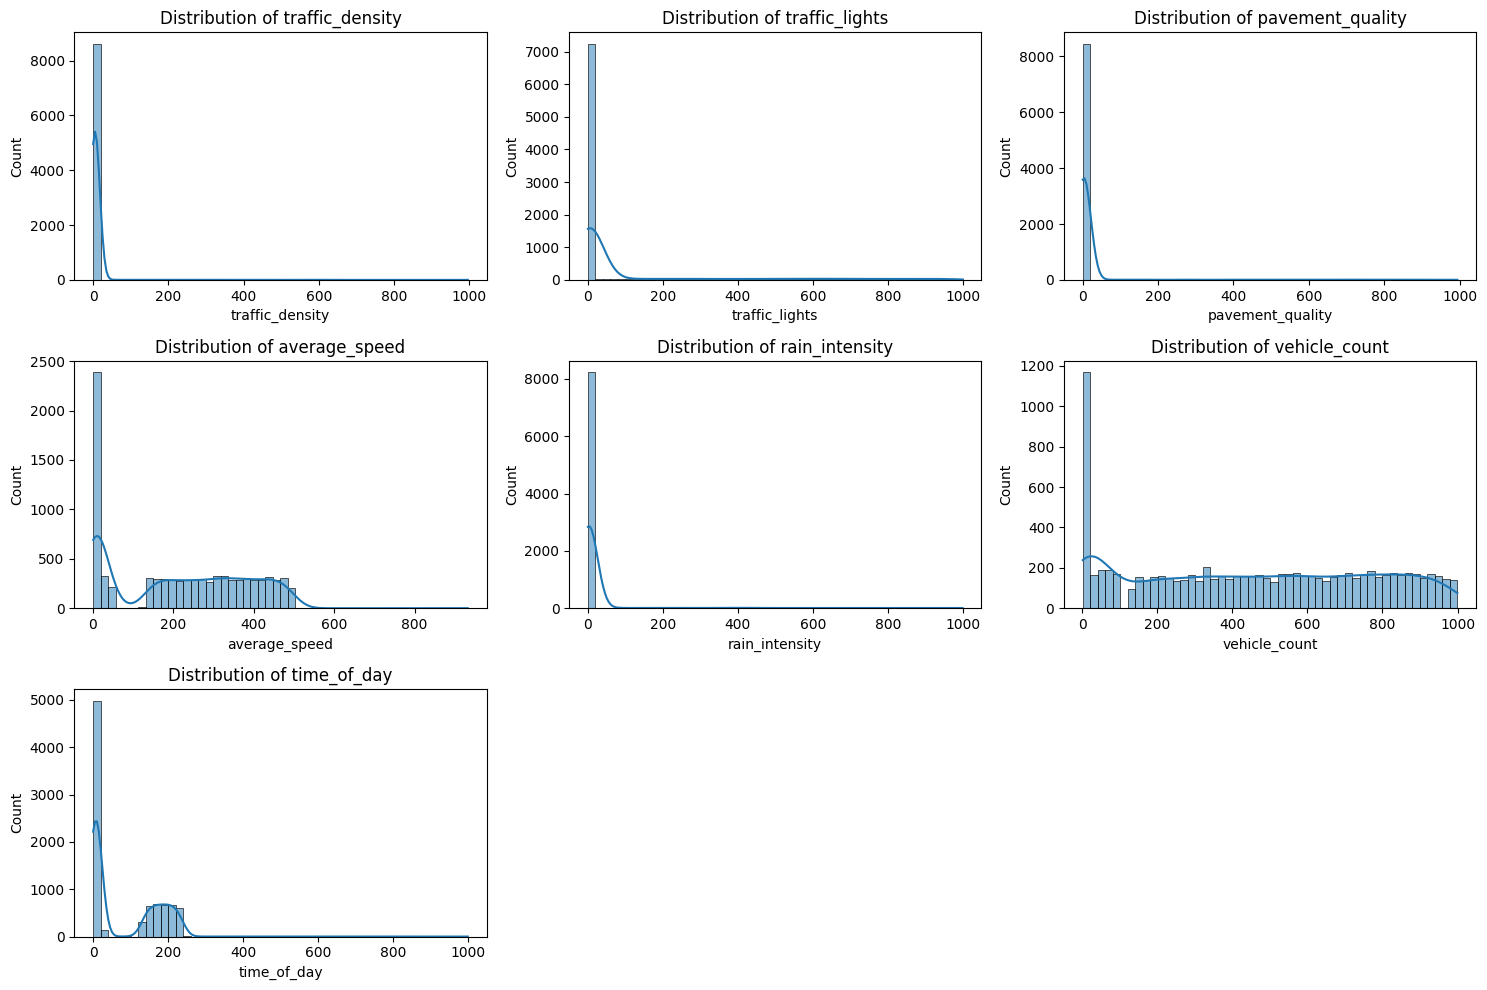

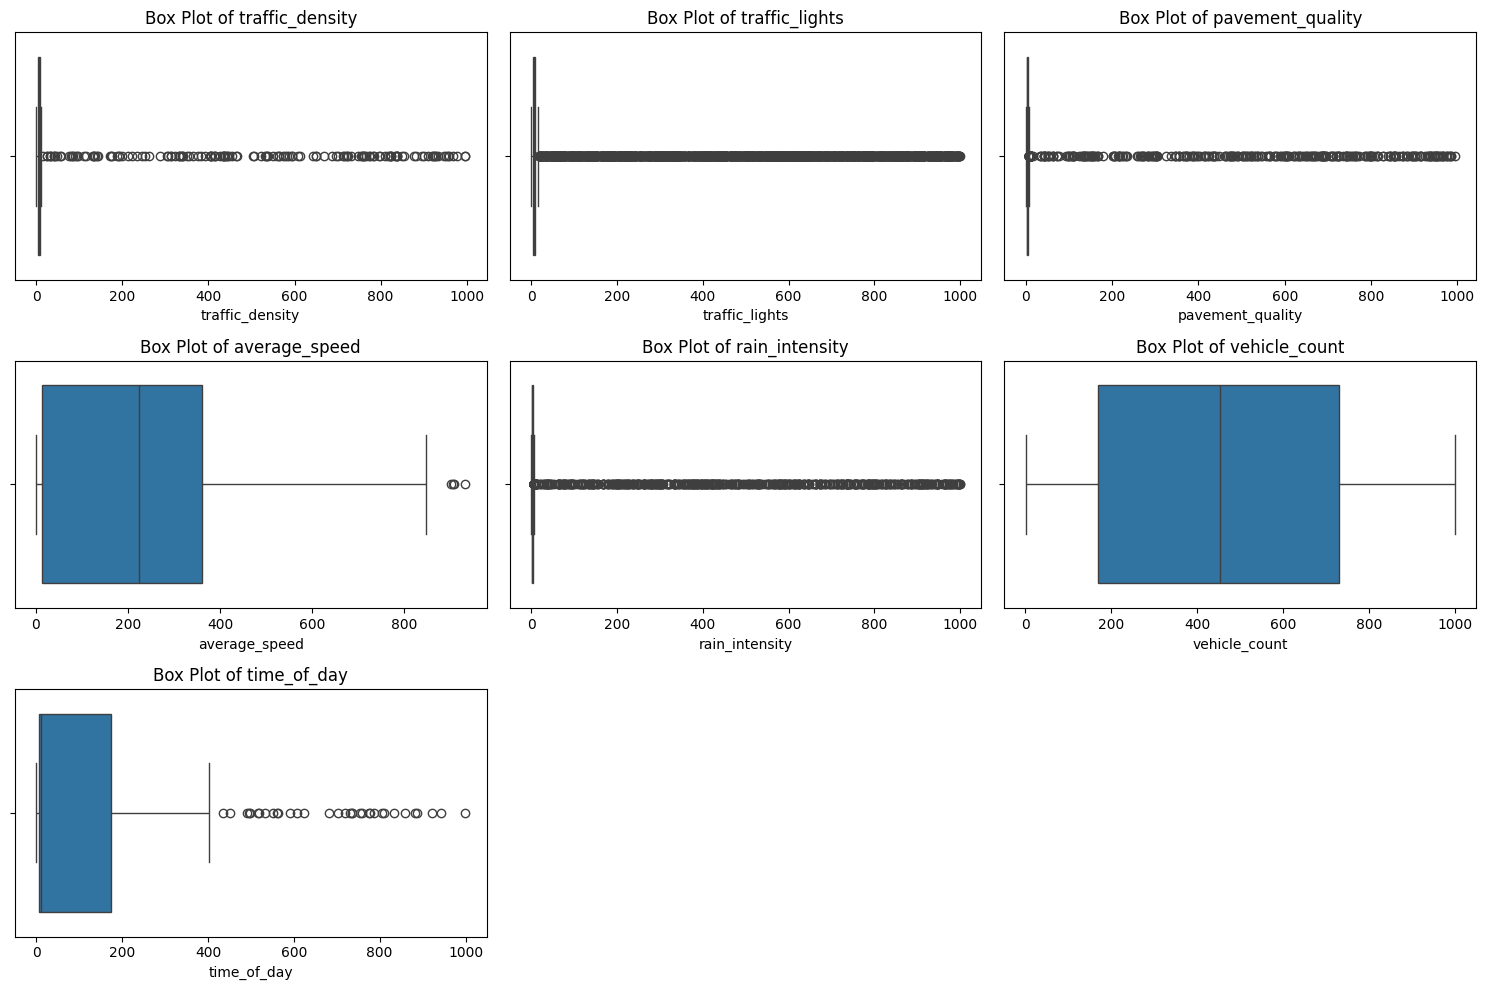

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = ['traffic_density', 'traffic_lights', 'pavement_quality',
            'average_speed', 'rain_intensity', 'vehicle_count', 'time_of_day']


plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df2[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


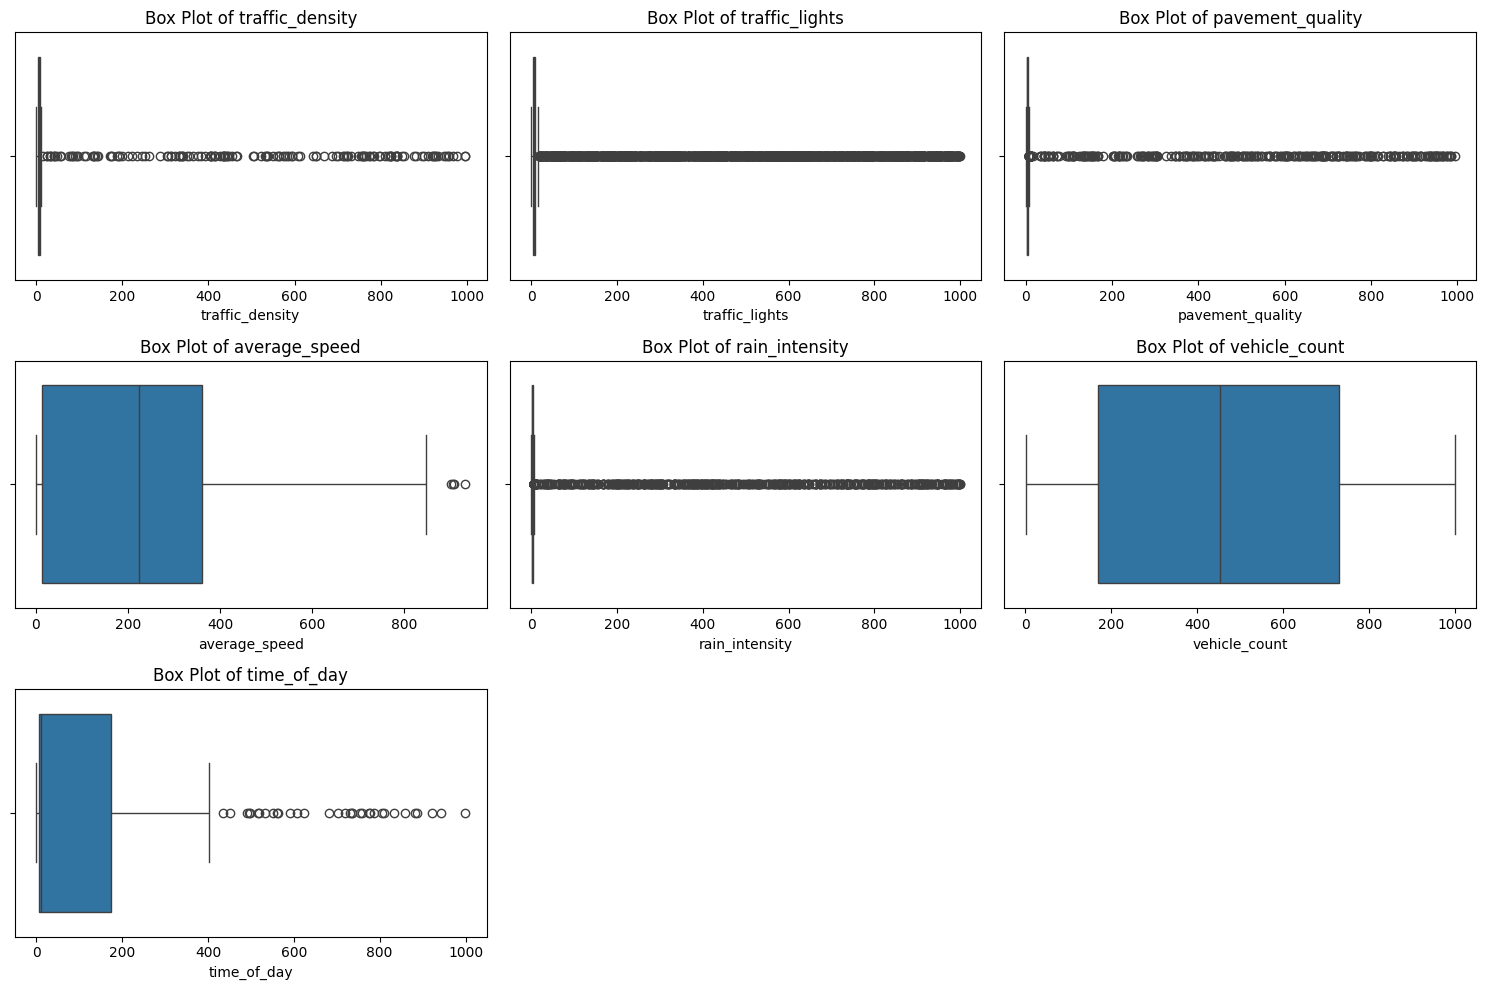

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df2[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [16]:
Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df2[~((df2[num_cols] < (Q1 - 1.5 * IQR)) | (df2[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
import numpy as np


Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_clean = df2[~((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound)).any(axis=1)]


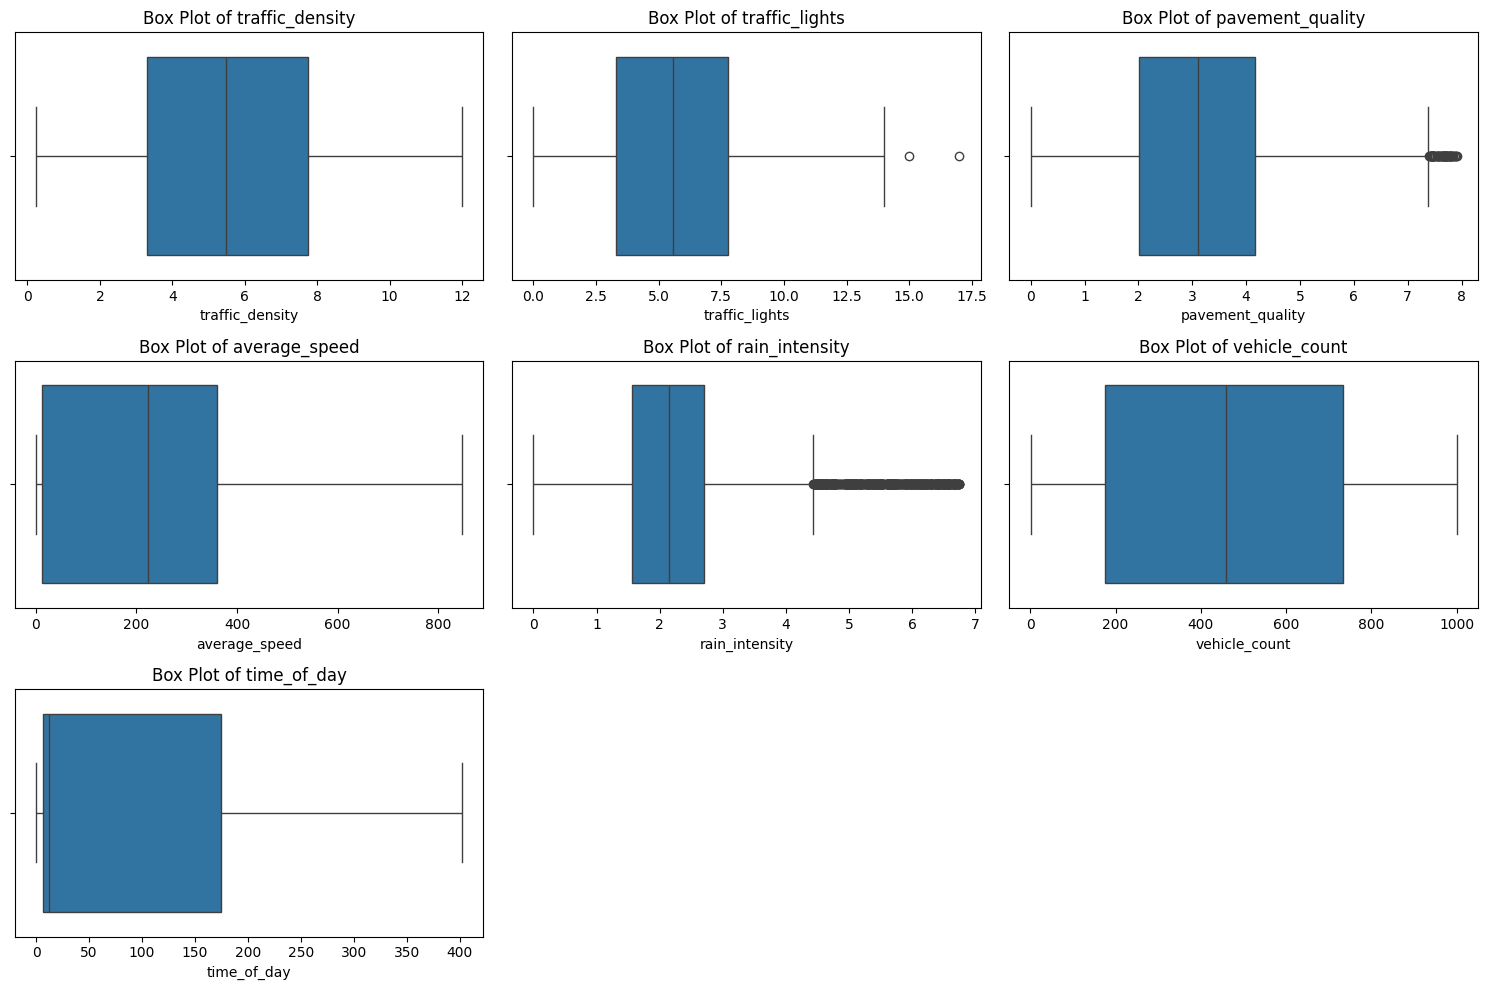

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))


for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


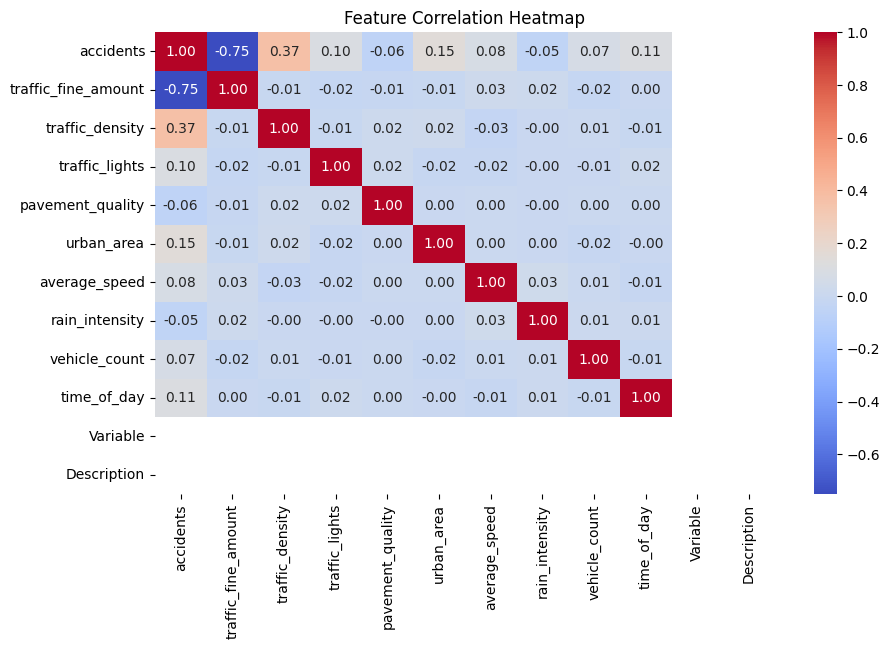

In [20]:

df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [37]:
df_clean['time_of_day'].head()
df_clean['time_of_day'].dtype
df_clean['time_of_day'].unique()[:10]  # Show first 10 unique values


array(['0 days 08:54:38.880000', '5 days 11:27:07.200000',
       '0 days 06:57:39.600000', '0 days 08:10:48.360000',
       '0 days 12:39:43.920000', '0 days 08:03:36.720000',
       '0 days 08:17:25.440000', '8 days 11:35:27.600000',
       '9 days 08:09:28.800000', '0 days 02:22:22.080000'], dtype=object)

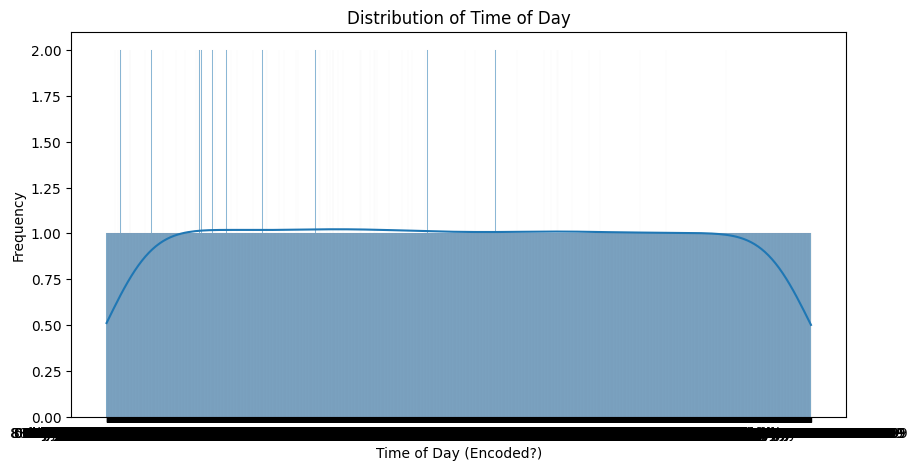

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df_clean['time_of_day'], bins=50, kde=True)
plt.xlabel("Time of Day (Encoded?)")
plt.ylabel("Frequency")
plt.title("Distribution of Time of Day")
plt.show()


In [39]:
print(df_clean['time_of_day'].dtype)
print(df_clean['time_of_day'].head(10))
df_clean['time_of_day'] = pd.to_numeric(df_clean['time_of_day'], errors='coerce')
df_clean['time_of_day'] = pd.to_timedelta(df_clean['time_of_day'], unit='m')
df_clean['hour_of_day'] = df_clean['time_of_day'].dt.total_seconds() / 3600  # Convert to hours


object
1     0 days 08:54:38.880000
3     5 days 11:27:07.200000
4     0 days 06:57:39.600000
5     0 days 08:10:48.360000
6     0 days 12:39:43.920000
7     0 days 08:03:36.720000
8     0 days 08:17:25.440000
9     8 days 11:35:27.600000
10    9 days 08:09:28.800000
12    0 days 02:22:22.080000
Name: time_of_day, dtype: object


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


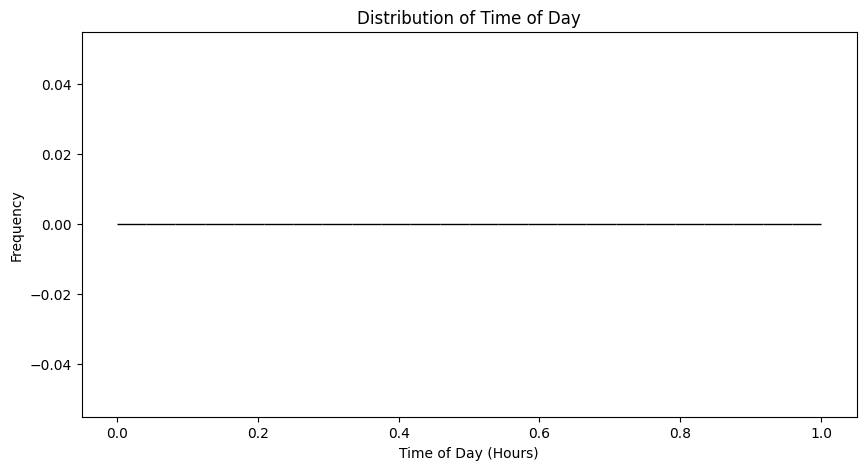

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['hour_of_day'], bins=24, kde=True)
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Frequency")
plt.title("Distribution of Time of Day")
plt.show()


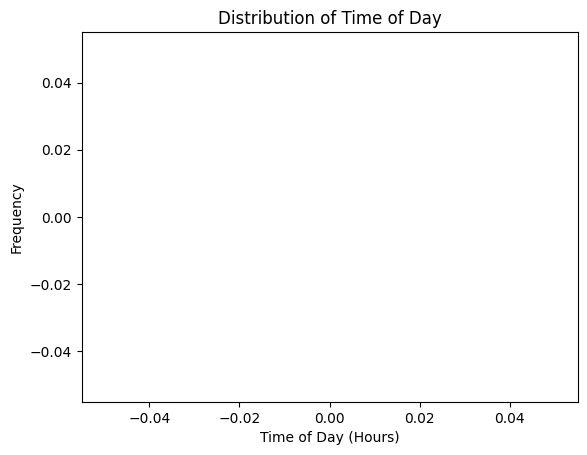

In [43]:

df_clean['hour_of_day'] = pd.to_numeric(df_clean['time_of_day'], errors='coerce') / 60


df_clean = df_clean[(df_clean['hour_of_day'].notna()) & (df_clean['hour_of_day'] >= 0) & (df_clean['hour_of_day'] < 24)]

sns.histplot(df_clean['hour_of_day'], bins=24, kde=True)
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Frequency")
plt.title("Distribution of Time of Day")
plt.show()


In [46]:
print(df_clean.columns)
df_clean.rename(columns={'Severity': 'severity'}, inplace=True)


Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'Variable', 'Description',
       'hour_of_day'],
      dtype='object')


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_clean.rename(columns=lambda x: x.strip().lower(), inplace=True)


if 'severity' not in df_clean.columns:
    print("Column 'severity' not found. Available columns:", df_clean.columns)
else:

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(df_clean['hour_of_day'].dropna(), bins=24, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title("Distribution of Time of Day")
    axes[0, 0].set_xlabel("Time of Day (Hours)")

    sns.countplot(x='severity', data=df_clean, ax=axes[0, 1])
    axes[0, 1].set_title("Accident Severity Distribution")

    sns.countplot(y='weather_condition', data=df_clean, order=df_clean['weather_condition'].value_counts().index, ax=axes[1, 0])
    axes[1, 0].set_title("Weather Condition Distribution")

    sns.countplot(y='road_surface_condition', data=df_clean, order=df_clean['road_surface_condition'].value_counts().index, ax=axes[1, 1])
    axes[1, 1].set_title("Road Surface Condition Distribution")

    plt.tight_layout()
    plt.show()


Column 'severity' not found. Available columns: Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'variable', 'description',
       'hour_of_day'],
      dtype='object')


Dataset 1 Sample:
   Severity           Start_Time  Temperature(F)  Humidity(%)  Visibility(mi)  \
0         3  2016-02-08 05:46:00            36.9         91.0            10.0   
1         2  2016-02-08 06:07:59            37.9        100.0            10.0   
2         2  2016-02-08 06:49:27            36.0        100.0            10.0   
3         3  2016-02-08 07:23:34            35.1         96.0             9.0   
4         2  2016-02-08 07:39:07            36.0         89.0             6.0   

  Weather_Condition  
0        Light Rain  
1        Light Rain  
2          Overcast  
3     Mostly Cloudy  
4     Mostly Cloudy  
Dataset 2 Sample:
   accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20               4.3709           2.3049         753.000   
1         11               9.5564           3.2757           5.452   
2         19               7.5879           2.0989           6.697   
3         23               6.3879           4.9188           9.41

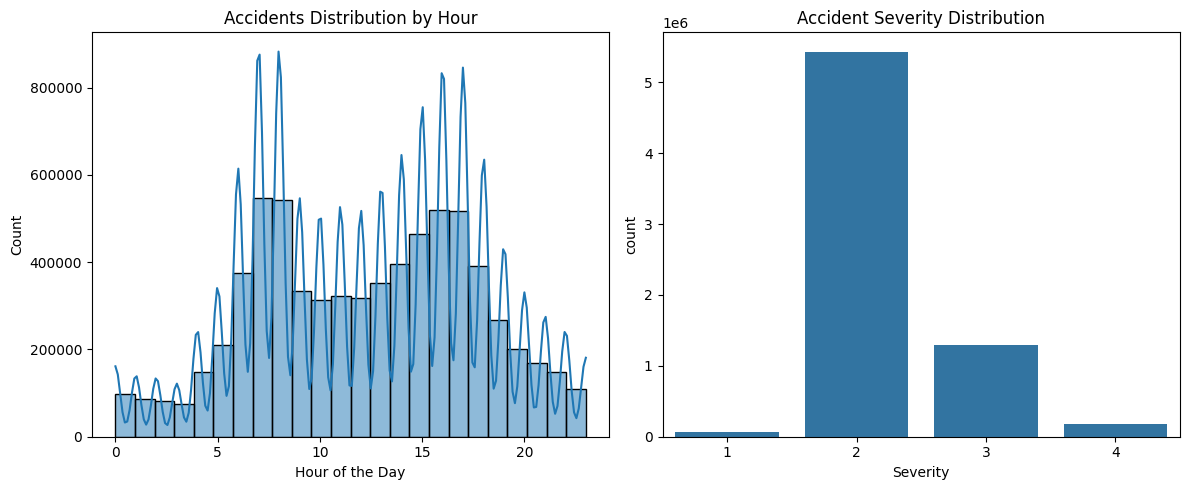

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"
dataset_2_path = "/content/traffic_accidents_dict new.csv"


columns_needed = ['Severity', 'Start_Time', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Weather_Condition']

df1 = pd.read_csv(dataset_1_path, usecols=columns_needed, low_memory=False)
df2 = pd.read_csv(dataset_2_path, low_memory=False)


print("Dataset 1 Sample:")
print(df1.head())

print("Dataset 2 Sample:")
print(df2.head())


df1['Start_Time'] = pd.to_datetime(df1['Start_Time'], errors='coerce')
df1['hour_of_day'] = df1['Start_Time'].dt.hour


df1_clean = df1.dropna(subset=['hour_of_day'])
df1_clean.reset_index(drop=True, inplace=True)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(df1_clean['hour_of_day'], bins=24, kde=True, ax=axes[0])
axes[0].set_title("Accidents Distribution by Hour")
axes[0].set_xlabel("Hour of the Day")


sns.countplot(x='Severity', data=df1_clean, ax=axes[1])
axes[1].set_title("Accident Severity Distribution")

plt.tight_layout()
plt.show()


Weather_Condition
Fair                       2560802
Mostly Cloudy              1016195
Cloudy                      817082
Clear                       808743
Partly Cloudy               698972
Overcast                    382866
Light Rain                  352957
Scattered Clouds            204829
Light Snow                  128680
Fog                          99238
Rain                         84331
Haze                         76223
Fair / Windy                 35671
Heavy Rain                   32309
Light Drizzle                22684
Thunder in the Vicinity      17611
Cloudy / Windy               17035
T-Storm                      16810
Mostly Cloudy / Windy        16508
Snow                         15537
Name: count, dtype: int64


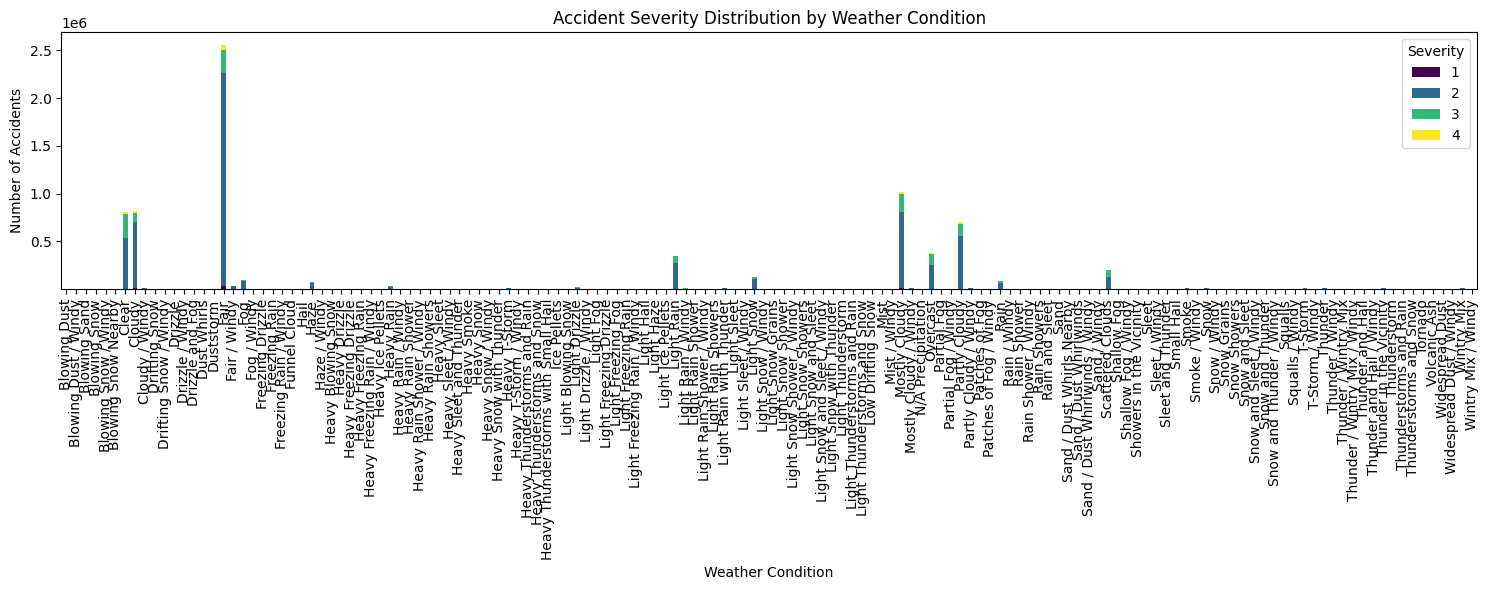

In [6]:

import pandas as pd
import matplotlib.pyplot as plt

##Here I'm grouping weather conditions
def simplify_weather(condition):
    condition = str(condition).lower()
    if "rain" in condition or "drizzle" in condition:
        return "Rain"
    elif "snow" in condition:
        return "Snow"
    elif "fog" in condition or "mist" in condition or "haze" in condition:
        return "Fog"
    elif "thunder" in condition or "t-storm" in condition:
        return "Thunderstorm"
    elif "clear" in condition or "fair" in condition:
        return "Clear"
    elif "cloud" in condition or "overcast" in condition:
        return "Cloudy"
    else:
        return "Other"


###### Check unique weather conditions


df_weather["Weather_Simplified"] = df_weather["Weather_Condition"].apply(simplify_weather)


dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"

df_weather = pd.read_csv(dataset_1_path, usecols=["Severity", "Weather_Condition"], low_memory=False)

print(df_weather["Weather_Condition"].value_counts().head(20))

weather_severity = df_weather.groupby("Weather_Condition")["Severity"].value_counts().unstack()

weather_severity.plot(kind="bar", stacked=True, figsize=(15, 6), colormap="viridis")
plt.title("Accident Severity Distribution by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.legend(title="Severity")
plt.tight_layout()
plt.show()



In [9]:
!pip install folium


In [10]:
import folium
from folium.plugins import HeatMap
import pandas as pd


dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"
df_geo = pd.read_csv(dataset_1_path, usecols=["Start_Lat", "Start_Lng"], low_memory=False)


df_geo.dropna(subset=["Start_Lat", "Start_Lng"], inplace=True)


df_geo_sample = df_geo.sample(n=50000, random_state=42)
print(f"Sample shape: {df_geo_sample.shape}")


Sample shape: (50000, 2)


In [11]:

m = folium.Map(
    location=[df_geo_sample["Start_Lat"].mean(), df_geo_sample["Start_Lng"].mean()],
    zoom_start=4
)


heat_data = df_geo_sample[["Start_Lat", "Start_Lng"]].values.tolist()


HeatMap(heat_data).add_to(m)


m


In [13]:
print("Latitude Range:", df_geo_sample["Start_Lat"].min(), "to", df_geo_sample["Start_Lat"].max())
print("Longitude Range:", df_geo_sample["Start_Lng"].min(), "to", df_geo_sample["Start_Lng"].max())
df_geo_sample = df_geo_sample[
    (df_geo_sample["Start_Lat"] >= 24) & (df_geo_sample["Start_Lat"] <= 49) &
    (df_geo_sample["Start_Lng"] >= -125) & (df_geo_sample["Start_Lng"] <= -66)
]


Latitude Range: 24.60268 to 48.985481
Longitude Range: -124.535726 to -68.226869


In [14]:
import folium
from folium.plugins import HeatMap

m = folium.Map(
    location=[df_geo_sample["Start_Lat"].mean(), df_geo_sample["Start_Lng"].mean()],
    zoom_start=4
)

heat_data = df_geo_sample[["Start_Lat", "Start_Lng"]].values.tolist()
HeatMap(heat_data).add_to(m)

m


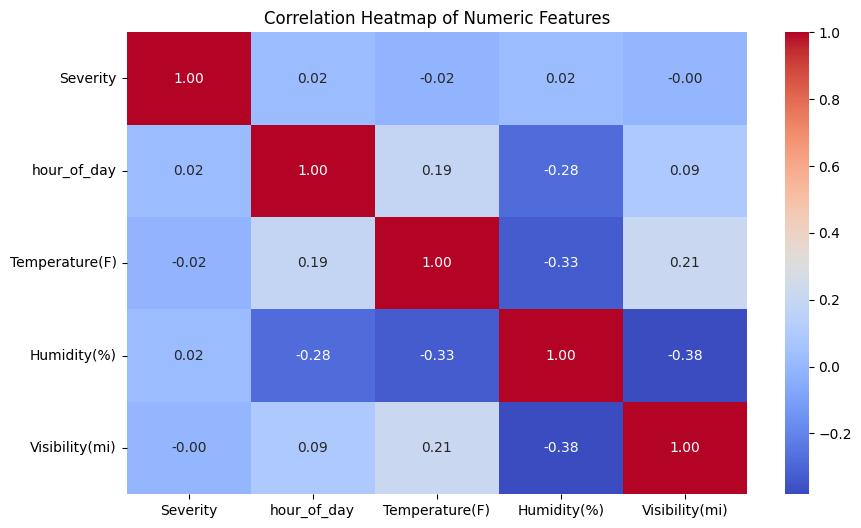

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset_1_path = "/root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv"


columns_needed = ['Severity', 'Start_Time', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Weather_Condition']
df1 = pd.read_csv(dataset_1_path, usecols=columns_needed, low_memory=False)


df1['Start_Time'] = pd.to_datetime(df1['Start_Time'], errors='coerce')
df1['hour_of_day'] = df1['Start_Time'].dt.hour

df_clean = df1.dropna(subset=['hour_of_day']).reset_index(drop=True)


numeric_cols = ['Severity', 'hour_of_day', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)']
df_numeric = df_clean[numeric_cols].dropna()


plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Dataset 2 Columns: Index(['accidents', 'traffic_fine_amount', 'traffic_density', 'traffic_lights',
       'pavement_quality', 'urban_area', 'average_speed', 'rain_intensity',
       'vehicle_count', 'time_of_day', 'Variable', 'Description'],
      dtype='object')
   accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20               4.3709           2.3049         753.000   
1         11               9.5564           3.2757           5.452   
2         19               7.5879           2.0989           6.697   
3         23               6.3879           4.9188           9.412   
4         23               2.4042           1.9610           7.393   

   pavement_quality  urban_area  average_speed  rain_intensity  vehicle_count  \
0            0.7700           1        321.592          1.1944       290.8570   
1            4.0540           1        478.623          6.2960       931.8120   
2          345.0000           0        364.476          2.8584       830

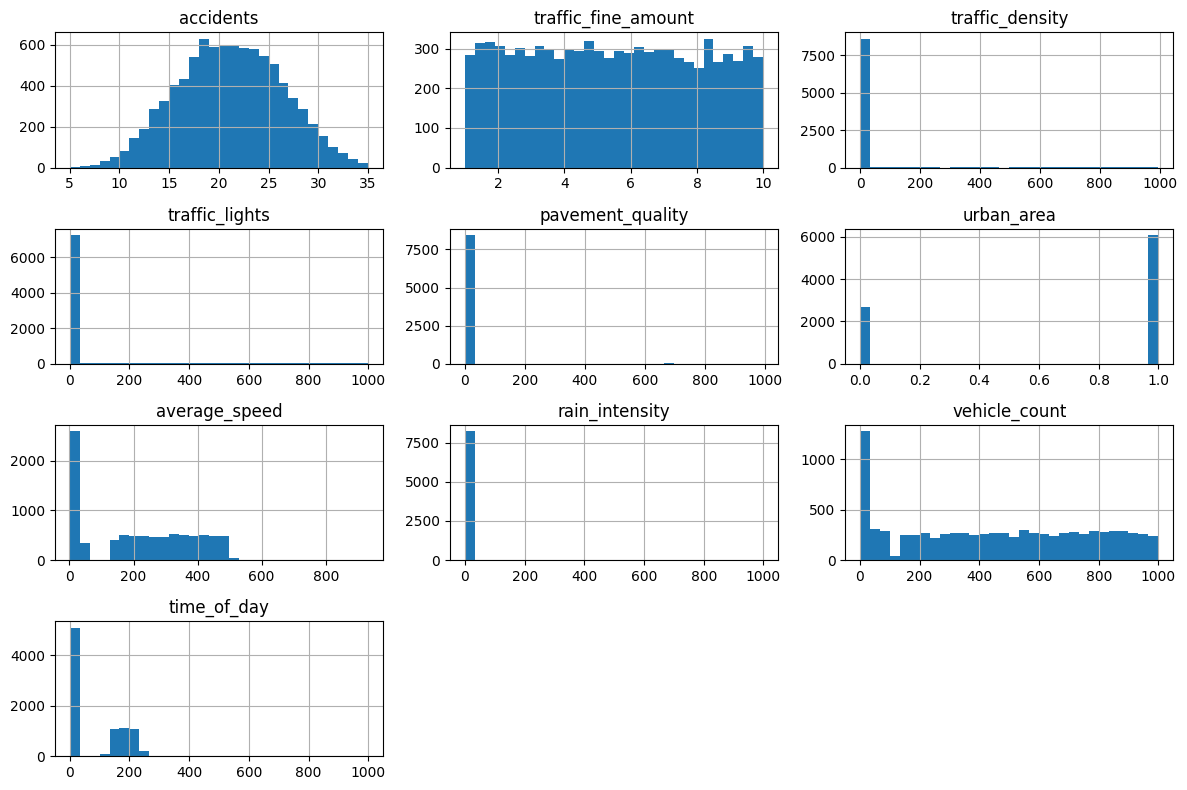

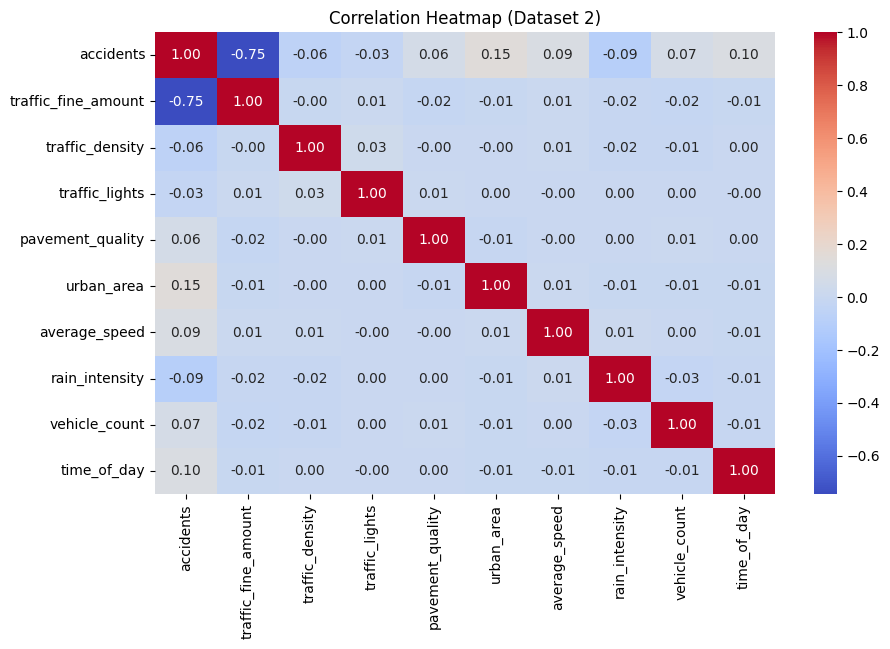

In [18]:
##Data set 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_2_path = "/content/traffic_accidents_dict new.csv"


df2 = pd.read_csv(dataset_2_path, low_memory=False)

print("Dataset 2 Columns:", df2.columns)
print(df2.head())


print("\nBasic Info on Dataset 2:")
print(df2.info())


print("\nStatistical Summary (Numerical Columns):")
print(df2.describe())

missing_values_df2 = df2.isnull().sum()
print("\nMissing Values in Dataset 2:")
print(missing_values_df2[missing_values_df2 > 0])


df2_clean = df2.dropna().reset_index(drop=True)
print(f"\nShape after dropping missing values: {df2_clean.shape}")


numeric_cols = ['accidents', 'traffic_fine_amount', 'traffic_density',
                'traffic_lights', 'pavement_quality', 'urban_area',
                'average_speed', 'rain_intensity', 'vehicle_count', 'time_of_day']


df2_clean[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df2_clean[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Dataset 2)")
plt.show()
